In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster




Calcolare statistiche descrittive (media, mediana, deviazione standard, ecc.) per ogni proprietà chimica.

In [4]:

# Caricare i dati
file_path = 'data/TC_MC_2_db.xlsx'  # Modifica il percorso al tuo file
data = pd.read_excel(file_path, sheet_name='chemical_property')

# Selezionare solo le colonne numeriche per l'analisi descrittiva
numeric_columns = ['MW', 'EXACT_MW', 'LOGP', 'TPSA', 'ATOM', 'HBA', 'HBD', 'ROTB', 'AROM', 'ALERTS', 'DL']

# Calcolare le statistiche descrittive
descriptive_stats = data[numeric_columns].describe()

# Visualizzare le statistiche descrittive
print(descriptive_stats)

# scrivi le statistiche descrittive in un file nella cartella stats e chiama il file primary_chemical_property_stats.csv
descriptive_stats.to_csv('stats/primary_chemical_property_stats.csv')


                 MW      EXACT_MW          LOGP          TPSA          ATOM  \
count  21153.000000  21153.000000  21153.000000  21153.000000  21153.000000   
mean     439.950225    439.646123      2.217606    122.958377     63.209663   
std      285.778960    285.604027      3.108437    115.566481     40.766723   
min       22.989769     22.989769    -13.515000      0.000000      1.000000   
25%      238.371000    238.193280      0.295000     40.460000     37.000000   
50%      368.385000    368.125988      2.292000     86.990000     52.000000   
75%      550.557000    550.189770      3.892000    175.370000     78.000000   
max     3965.256000   3962.684771     27.138000   1594.260000    434.000000   

                HBA           HBD          ROTB          AROM        ALERTS  \
count  21153.000000  21153.000000  21153.000000  21153.000000  21153.000000   
mean       7.134496      3.813880      6.551789      1.117950      1.331726   
std        6.901129      4.320947      6.122147    

Distribuzione delle proprietà chimiche come massa molecolare (MW), logP, TPSA, ecc.

In [18]:

# Funzione per creare istogrammi per le proprietà chimiche e salva questi file nella cartella plots
def plot_histograms(df, columns):
    for column in columns:
        plt.figure(figsize=(10, 6))  # Aumenta la risoluzione della figura
        plt.hist(df[column].dropna(), bins=30, edgecolor='k', alpha=0.7)
        plt.title(f'Distribuzione di {column}', fontsize=14)  # Aumenta la dimensione del titolo
        plt.xlabel(column, fontsize=12)  # Aumenta la dimensione dell'etichetta dell'asse x
        plt.ylabel('Frequenza', fontsize=12)  # Aumenta la dimensione dell'etichetta dell'asse y
        plt.grid(True)
        
        # Salva l'istogramma nella cartella plots
        plt.savefig(f'plots/{column}_histogram.png')
        plt.close()
# Colonne per le quali creare gli istogrammi
columns_to_plot = ['MW', 'EXACT_MW', 'LOGP', 'TPSA', 'ATOM', 'HBA', 'HBD', 'ROTB', 'AROM', 'ALERTS', 'DL']

# Creare gli istogrammi per le proprietà chimiche selezionate
plot_histograms(data, columns_to_plot)


Calcolare le correlazioni tra le diverse proprietà chimiche per identificare eventuali relazioni significative.

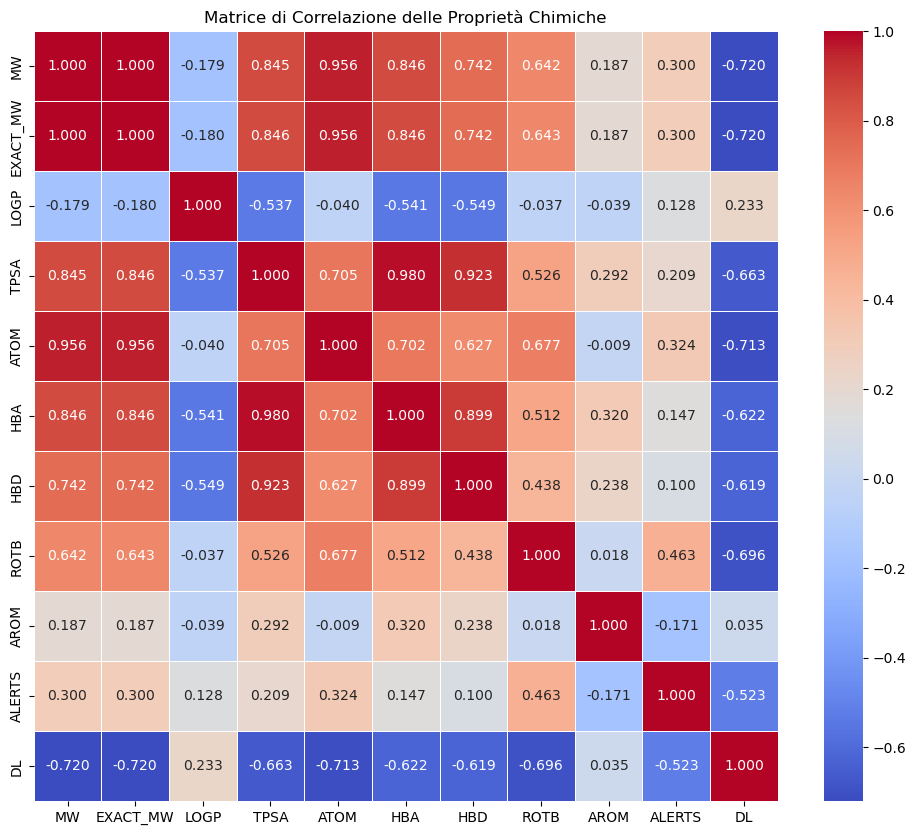

In [19]:
# Caricare i dati
file_path = 'data/TC_MC_2_db.xlsx'  # Modifica il percorso al tuo file
data = pd.read_excel(file_path, sheet_name='chemical_property')

# Selezionare solo le colonne numeriche per calcolare la correlazione
columns_to_plot = ['MW', 'EXACT_MW', 'LOGP', 'TPSA', 'ATOM', 'HBA', 'HBD', 'ROTB', 'AROM', 'ALERTS', 'DL']

# Calcolare la matrice di correlazione
correlation_matrix = data[columns_to_plot].corr(method='spearman') #ho usato il metodo di correlazione di spearman perche' non e' lineare

# Visualizzare la matrice di correlazione
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', linewidths=0.5)
plt.title('Matrice di Correlazione delle Proprietà Chimiche')
plt.show()

# Salvare la matrice di correlazione su un file
correlation_matrix.to_csv('stats/correlation_matrix.csv', index=True)


Analisi di Raggruppamento (Clustering):

Applicare tecniche di clustering (es. K-means, gerarchico) per identificare gruppi di composti con proprietà simili.

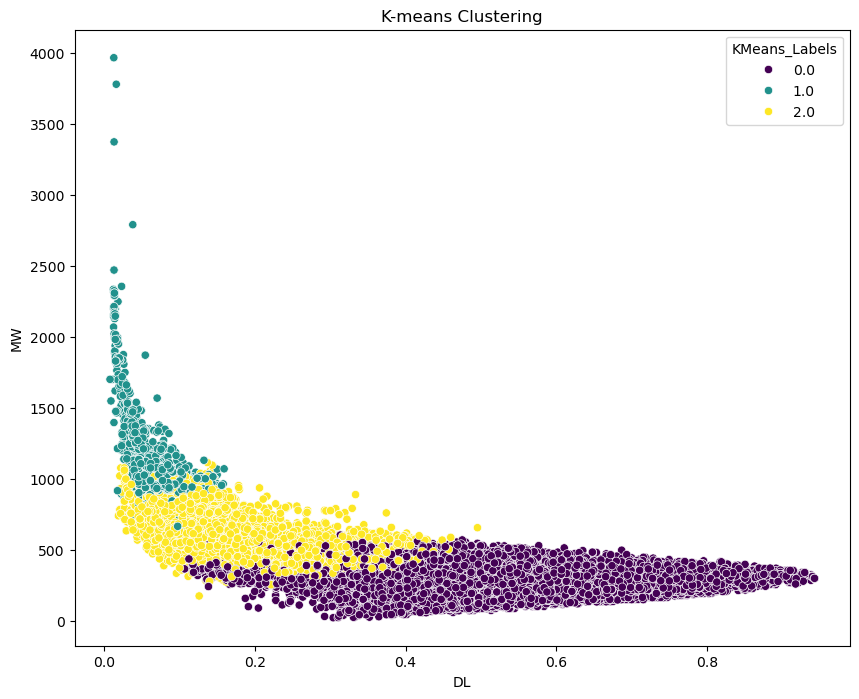

In [33]:

# Caricare i dati
file_path = 'data/TC_MC_2_db.xlsx'  # Modifica il percorso al tuo file
data = pd.read_excel(file_path, sheet_name='chemical_property')

# Selezionare solo le colonne numeriche per il clustering
columns_to_plot = ['MW', 'EXACT_MW', 'LOGP', 'TPSA', 'ATOM', 'HBA', 'HBD', 'ROTB', 'AROM', 'ALERTS', 'DL']
X = data[columns_to_plot].dropna()

# Standardizzare i dati
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applicare il K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Aggiungere le etichette del clustering K-means ai dati originali
data['KMeans_Labels'] = np.nan
data.loc[X.index, 'KMeans_Labels'] = kmeans_labels

# Visualizzare i risultati del K-means clustering per DL e MW
plt.figure(figsize=(10, 8))
sns.scatterplot(x='DL', y='MW', hue='KMeans_Labels', data=data, palette='viridis')
plt.title('K-means Clustering')
#salva il plot in una cartella
plt.savefig('clusters/DL_MW_clustering_results.png')
plt.show()
# Salvare i risultati del clustering K-means su un file
data.to_csv('clusters/DL_MW_clustering_results.csv', index=False)






DL e LOGP a confronto

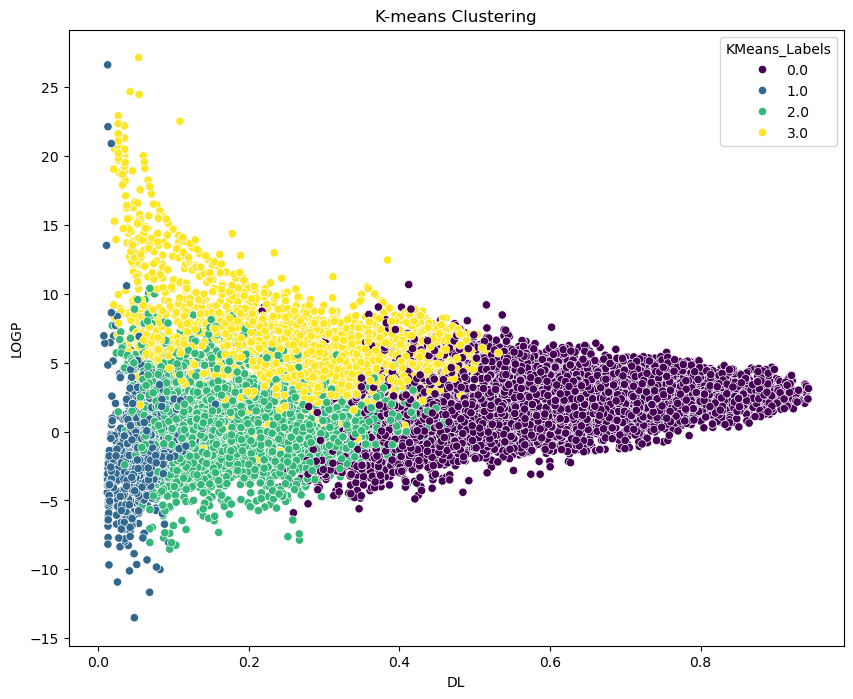

In [47]:
# Applicare il K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Aggiungere le etichette del clustering K-means ai dati originali
data['KMeans_Labels'] = np.nan
data.loc[X.index, 'KMeans_Labels'] = kmeans_labels

# Visualizzare i risultati del K-means clustering per DL e LOGP
plt.figure(figsize=(10, 8))
sns.scatterplot(x='DL', y='LOGP', hue='KMeans_Labels', data=data, palette='viridis')
plt.title('K-means Clustering')
#salva il plot in una cartella
plt.savefig('clusters/DL_LOGP_clustering_results.png')
plt.show()
# Salvare i risultati del clustering K-means su un file
data.to_csv('clusters/DL_LOGP_clustering_results.csv', index=False)

NATOMS e DL

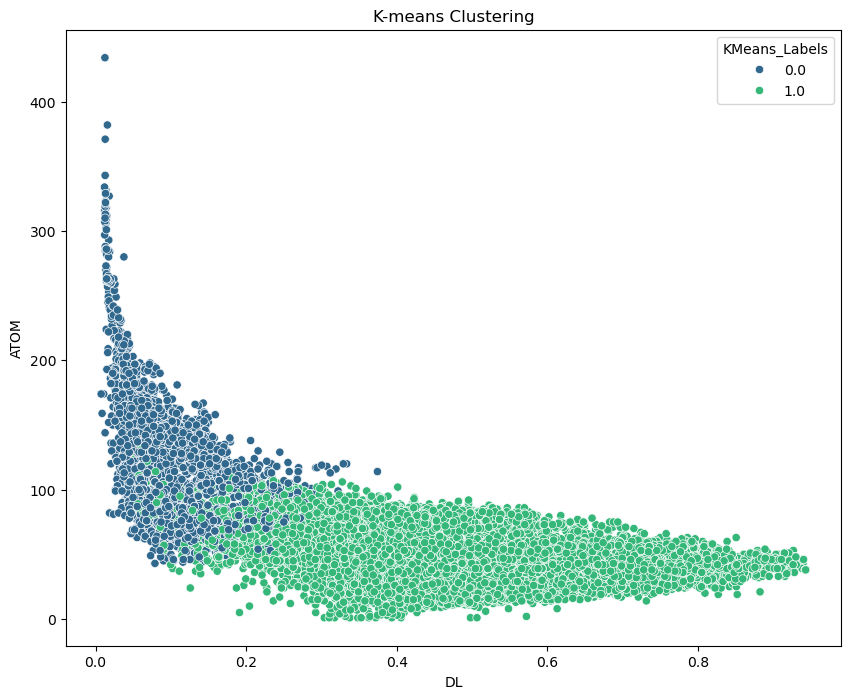

In [45]:
# Applicare il K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Aggiungere le etichette del clustering K-means ai dati originali
data['KMeans_Labels'] = np.nan
data.loc[X.index, 'KMeans_Labels'] = kmeans_labels

# Visualizzare i risultati del K-means clustering per DL e LOGP
plt.figure(figsize=(10, 8))
sns.scatterplot(x='DL', y='ATOM', hue='KMeans_Labels', data=data, palette='viridis')
plt.title('K-means Clustering')
#salva il plot in una cartella
plt.savefig('clusters/DL_ATOM_clustering_results.png')
plt.show()
# Salvare i risultati del clustering K-means su un file
data.to_csv('clusters/DL_ATOM_clustering_results.csv', index=False)

Prova con DBSCAN (fallimentare, la forma irregolare non mi piace)

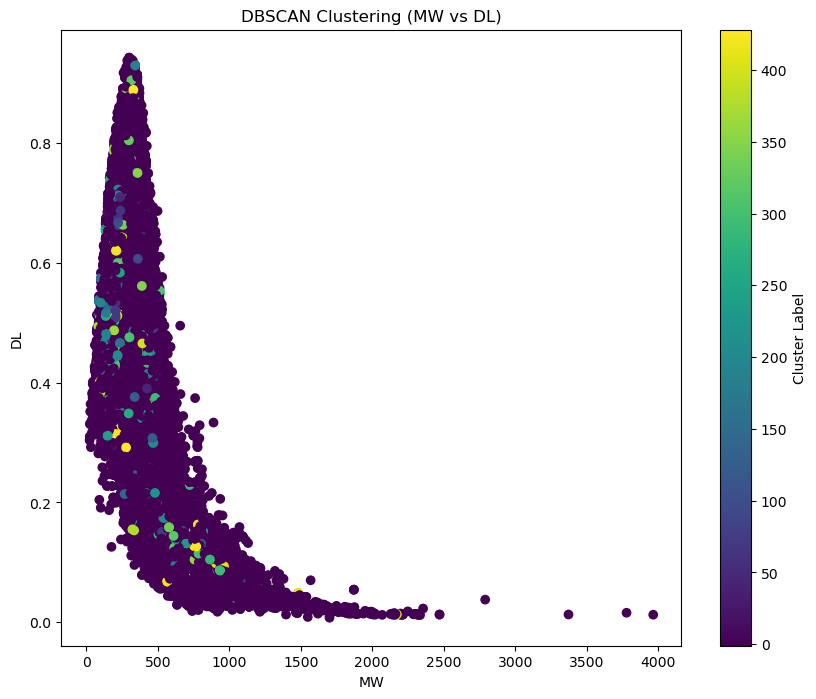

In [42]:

# Caricare i dati
file_path = 'data/TC_MC_2_db.xlsx'  # Modifica il percorso al tuo file
data = pd.read_excel(file_path, sheet_name='chemical_property')

# Selezionare solo le colonne numeriche per il clustering
columns_to_plot = ['MW', 'EXACT_MW', 'LOGP', 'TPSA', 'ATOM', 'HBA', 'HBD', 'ROTB', 'AROM', 'ALERTS', 'DL']
X = data[columns_to_plot].dropna()

# Standardizzare i dati
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applicare il clustering DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Aggiungere le etichette del clustering DBSCAN ai dati originali
data['DBSCAN_Labels'] = np.nan
data.loc[X.index, 'DBSCAN_Labels'] = dbscan_labels

# Visualizzare i risultati del clustering DBSCAN con un scatter plot per MW e DL
plt.figure(figsize=(10, 8))
scatter = plt.scatter(data.loc[X.index, 'MW'], data.loc[X.index, 'DL'], c=dbscan_labels, cmap='viridis')
plt.xlabel('MW')
plt.ylabel('DL')
plt.colorbar(scatter, label='Cluster Label')
plt.title('DBSCAN Clustering (MW vs DL)')
plt.show()

# Salvare i risultati del clustering DBSCAN su un file
clustering_results = data[['ID', 'DBSCAN_Labels']]
clustering_results.to_csv('dbscan_DL_MW_clustering_results.csv', index=False)



Visualizzazioni:

Creare grafici di distribuzione per le varie proprietà chimiche.
Scatter plots per visualizzare le relazioni tra coppie di proprietà.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Caricare i dati
file_path = 'data/TC_MC_2_db.xlsx'  # Modifica il percorso al tuo file
data = pd.read_excel(file_path, sheet_name='chemical_property')

# Selezionare solo le colonne numeriche per le visualizzazioni
columns_to_plot = ['MW', 'EXACT_MW', 'LOGP', 'TPSA', 'ATOM', 'HBA', 'HBD', 'ROTB', 'AROM', 'ALERTS', 'DL']

# Creare grafici di distribuzione per le varie proprietà chimiche
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column].dropna(), kde=True)
    plt.title(f'Distribuzione di {column}')
    plt.xlabel(column)
    plt.ylabel('Frequenza')
    plt.grid(True)
    plt.show()

# Creare scatter plots per visualizzare le relazioni tra coppie di proprietà
pairs_to_plot = [
    ('MW', 'LOGP'),
    ('MW', 'TPSA'),
    ('LOGP', 'TPSA'),
    ('ATOM', 'HBA'),
    ('HBA', 'HBD'),
    ('MW', 'DL'),
    ('LOGP', 'DL'),
    ('ATOM', 'DL')
]

for (x, y) in pairs_to_plot:
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=data[x], y=data[y])
    plt.title(f'{x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(True)
    plt.show()
